In [1]:
%load_ext nb_black
# !pip install nb_black
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics as m
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE  # doctest: +NORMALIZE_WHITESPACE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from mlxtend.feature_selection import ColumnSelector
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier
from thundersvm import SVC as svmgpu
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE, SMOTENC  # doctest: +NORMALIZE_WHITESPACE

# from multiscorer import MultiScorer
from sklearn.model_selection import cross_val_score
from numpy import average
import xgboost as xgb
from sklearn import metrics as m
import itertools

<IPython.core.display.Javascript object>

In [3]:
randomseed = 7
np.random.seed(randomseed)

<IPython.core.display.Javascript object>

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

data=datasets.load_diabetes()
x=data.data
y=data.target

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=randomseed,test_size=0.2)


<IPython.core.display.Javascript object>

In [15]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

<IPython.core.display.Javascript object>

In [5]:
from sklearn.ensemble import RandomForestClassifier

<IPython.core.display.Javascript object>

In [6]:
from sklearn.base import clone


def drop_col_feat_imp(model, X_train, y_train, random_state=42):

    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []

    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis=1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis=1), y_train)
        importances.append(benchmark_score - drop_col_score)

    importances_df = imp_df(X_train.columns, importances)
    return importances_df

<IPython.core.display.Javascript object>

In [7]:
rf = RandomForestClassifier(
    random_state=randomseed,
    n_estimators=100,
    max_depth=12,
    min_samples_split=2,
    min_samples_leaf=10,
    max_features="auto",
)

<IPython.core.display.Javascript object>

In [8]:
from sklearn.base import clone


def imp_df(column_names, importances):
    df = (
        pd.DataFrame({"feature": column_names, "feature_importance": importances})
        #         .sort_values("feature_importance", ascending=False)
        #         .reset_index(drop=True)
    )
    return df


def drop_col_feat_imp(model, X_train, y_train, xtest, ytest, random_state=42):

    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(xtest, ytest)
    benchmark_featureimportance = model_clone.feature_importances_

    print(benchmark_score)
    # list for storing feature importances
    importances = []

    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        print(col)
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis=1), y_train)
        drop_col_score = model_clone.score(xtest.drop(col, axis=1), ytest)
        importances.append(benchmark_score - drop_col_score)
        print(benchmark_score - drop_col_score, drop_col_score)

    importances_df = imp_df(X_train.columns, importances)
    return importances_df, benchmark_score, benchmark_featureimportance

<IPython.core.display.Javascript object>

In [9]:
importances_df, benchmark_score, benchmark_featureimportance = drop_col_feat_imp(
    rf,
    pd.DataFrame(xtrain, columns=data.feature_names),
    ytrain,
    pd.DataFrame(xtest, columns=data.feature_names),
    ytest,
    randomseed,
)

0.011235955056179775
age
0.0 0.011235955056179775
sex
0.0 0.011235955056179775
bmi
0.0 0.011235955056179775
bp
0.0 0.011235955056179775
s1
0.0 0.011235955056179775
s2
0.0 0.011235955056179775
s3
0.011235955056179775 0.0
s4
0.011235955056179775 0.0
s5
0.0 0.011235955056179775
s6
0.0 0.011235955056179775


<IPython.core.display.Javascript object>

In [10]:
Finalvalue = pd.DataFrame()
Finalvalue["features"] = data.feature_names
Finalvalue["benchmark_featureimportance"] = benchmark_featureimportance
Finalvalue["importances_df"] = -importances_df.feature_importance
Finalvalue["newScore"] = benchmark_score - importances_df.feature_importance
Finalvalue = Finalvalue.sort_values(
    by="benchmark_featureimportance", ascending=False
).reset_index(drop=True)

<IPython.core.display.Javascript object>

<BarContainer object of 10 artists>

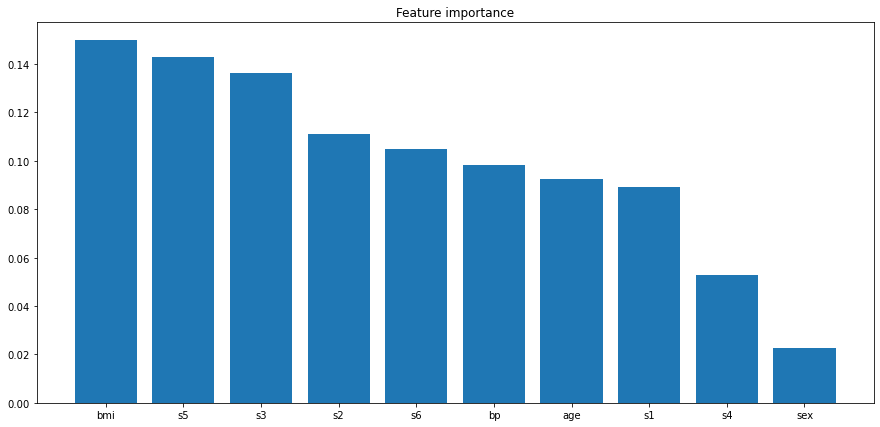

<IPython.core.display.Javascript object>

In [11]:
plt.rcParams["figure.figsize"] = (15, 7)
plt.title("Feature importance")
plt.bar(Finalvalue.features, Finalvalue.benchmark_featureimportance)

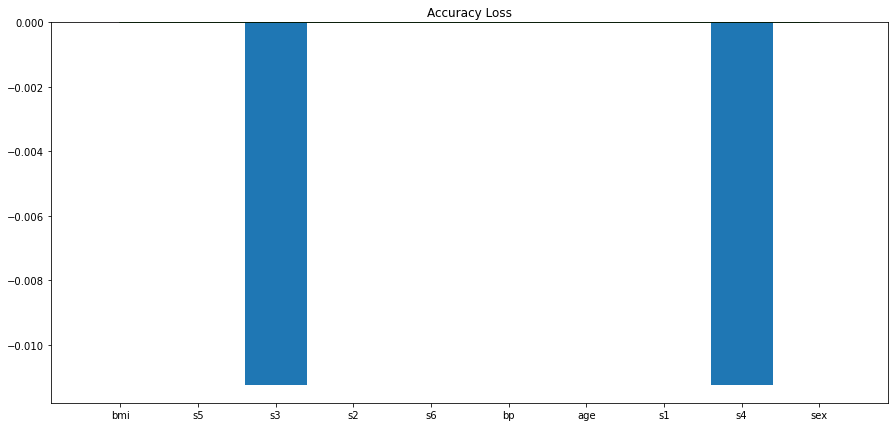

<IPython.core.display.Javascript object>

In [12]:
plt.bar(Finalvalue.features, Finalvalue.importances_df)
plt.title("Accuracy Loss")
plt.plot(
    Finalvalue.features, np.full((len(Finalvalue.features), 1), 0.0), color="green"
)

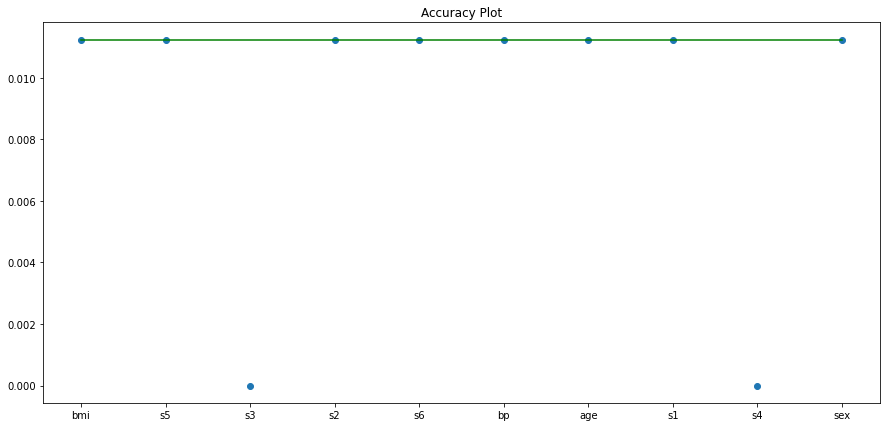

<IPython.core.display.Javascript object>

In [13]:
plt.scatter(Finalvalue.features, Finalvalue.newScore)
plt.title("Accuracy Plot")
plt.plot(
    Finalvalue.features,
    np.full((len(Finalvalue.features), 1), benchmark_score),
    color="green",
)

In [14]:
Finalvalue

,features,benchmark_featureimportance,importances_df,newScore
0,bmi,0.149761,-0.000000,0.011236
1,s5,0.143001,-0.000000,0.011236
2,s3,0.136101,-0.011236,0.000000
3,s2,0.110996,-0.000000,0.011236
4,s6,0.104844,-0.000000,0.011236
5,bp,0.098222,-0.000000,0.011236
6,age,0.092289,-0.000000,0.011236
7,s1,0.089286,-0.000000,0.011236
8,s4,0.052677,-0.011236,0.000000
9,sex,0.022823,-0.000000,0.011236


<IPython.core.display.Javascript object>